In [1]:
import sys, os, datetime
sys.path.append("../../")

from utils.contract_utils import init_contract
from utils.network_utils import configure_network_and_connect

import brownie

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Connect to mainnet (archive node required: use Alchemy)

In [3]:
ALCHEMY_API_KEY = os.environ['ALCHEMY_API_KEY']
configure_network_and_connect(
    node_provider_https=f"https://eth-mainnet.alchemyapi.io/v2/{ALCHEMY_API_KEY}",
    network_name='mainnet'
)

load mim-3crv pool contract

In [4]:
pool_contract_addr = "0x5a6A4D54456819380173272A5E8E9B9904BdF41B"  # mim-3crv pool
pool_contract_genesis = 12567592
pool_contract = init_contract(pool_contract_addr)
pool_name = pool_contract.name()
pool_contract.info()

  @title StableSwap
  @notice 3pool metapool implementation contract
  @author Curve.Fi



get current block:

In [5]:
current_block = brownie.web3.eth.block_number
current_block

datetime.datetime.fromtimestamp(brownie.web3.eth.get_block(current_block)['timestamp'])

datetime.datetime(2021, 9, 18, 14, 13, 51)

In [6]:
go_back_steps = 10000  # blocks

Step backwards in block height to get pool parameters.

In [7]:
print(f"Fetching historic A parameters for {pool_contract_addr} ({pool_name})")
historic_A = []
block_timestamp = []
queried_blocks = list(range(current_block, pool_contract_genesis, -1*go_back_steps))
for i in queried_blocks:
    block_timestamp.append(
        datetime.datetime.fromtimestamp(
            brownie.web3.eth.get_block(i)['timestamp']
        )
    )
    historic_A.append(pool_contract.A(block_identifier=i))

Fetching historic A parameters for 0x5a6A4D54456819380173272A5E8E9B9904BdF41B (Curve.fi Factory USD Metapool: Magic Internet Money 3Pool)


In [12]:
data = pd.DataFrame(index=queried_blocks[::-1])
data['block_timestamp'] = block_timestamp[::-1]
data['historic_A'] = historic_A[::-1]
data.shape

(69, 2)

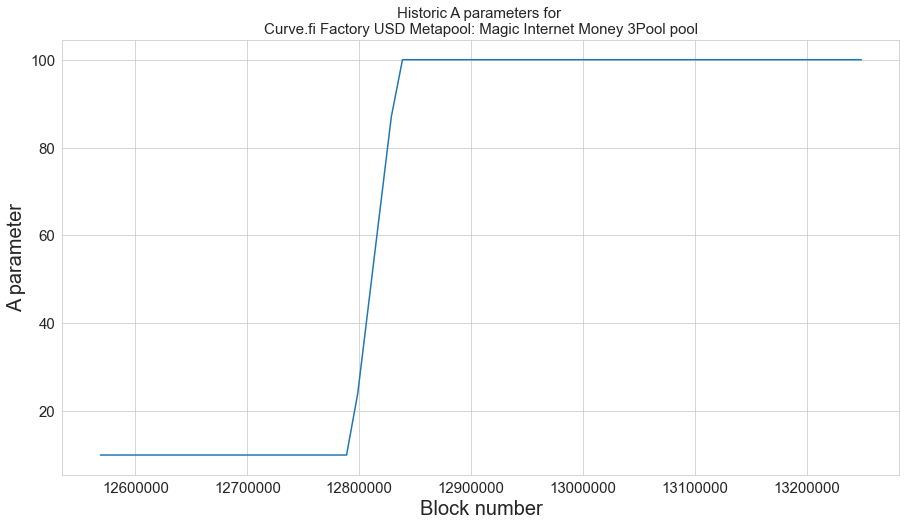

In [16]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))

ax.plot(data.index, data.historic_A)

ax.set_xlabel("Block number", fontsize=20)
ax.set_ylabel("A parameter", fontsize=20)
ax.set_title(f"Historic A parameters for \n{pool_name} pool", fontsize=15);
ax.tick_params(axis='both', which='major', labelsize=15);
ax.get_xaxis().get_major_formatter().set_scientific(False);



Disconnect.

In [10]:
brownie.network.disconnect()